In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

                                                Custom slots

In [ ]:
#function for plotting images
def plot_img(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

In [8]:
#function for calculating mid-point
def mid_point(tup):
    x1 = tup[0]
    y1 = tup[1]
    x2 = tup[2]
    y2 = tup[3]
    mp = [(x1+x2)/2,(y1+y2)/2]
    return mp

In [9]:
#function for calculating distance
def dist(p1,p2):
    x1 ,y1 = p1[0] , p1[1]
    x2 , y2 = p2[0] , p2[1]
    dist = (((x1-x2)**2 + (y1-y2)**2)**0.5)
    return dist

In [37]:
#function for rounding floating numbers
def fround(a):
    b = abs(a-int(a))
    c=0
    if b>0.5:
        c = int(a)+1
    else:
        c = int(a)
    return c

In [75]:
#function for selecting custom slots of parking space
def select_slots(img):
    img2 = img.copy() #copying image 
    img3 = img.copy() #copying image
    decay = 1 #a value to increase y axis consecutively
    count = 0
    ch = "y"
    boxes = [] #list for storing the coordinates of the box
    while ch == "y":
        r = cv2.selectROI(img2) #select the slot of the parking slot
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        crop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])] #taking out the slot part from the image
        cv2.rectangle(img2,(int(r[0]),int(r[1])),(int(r[0]+r[2]),int(r[1]+r[3])),(0,0,255),2) #drawing rectangle over it
        top_line = [r[0],r[1],r[0]+r[2],r[1]] #getting the coordinates of the top line
        print("Crop coord : {} {} {} {}".format(int(r[1]),int(r[1]+r[3]), int(r[0]),int(r[0]+r[2])))
        b = cv2.selectROI(img2) #draw line from the top_line to determine the width of each slot
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #cv2.line(img2,(int(b[0]),int(b[1])),(int(b[0]+b[2]),int(b[1]+b[3])),(0,255,0),2)

        bottom_line = [b[0],b[1],b[0]+b[2],b[1]+b[3]] #getting coordinates of the segment line
        mp_top = mid_point(top_line)
        mp_bottom = mid_point(bottom_line)
        seg_dist = dist(mp_top,mp_bottom)
        tot_dist = abs(r[1]+r[3] - r[1])
        no_of_segments = fround(tot_dist/seg_dist) # calculate number of segments
        (tx1,ty1) , (tx2,ty2) = (int(r[0]),int(r[1])),(int(mp_bottom[0]),int(mp_bottom[1])) # coordinates for left most box
        (bx1,by1) , (bx2,by2) = (int(mp_top[0]),int(mp_top[1])),(int(b[0]+b[2]),int(b[1]+b[3])) #coordinates for right most box
        for i in range(int(no_of_segments)):
            cv2.rectangle(img2,(tx1,ty1) , (tx2,ty2),(0,255,0),2)
            cv2.rectangle(img2, (bx1,by1) , (bx2,by2),(0,255,0),2)
            boxes.append([tx1,ty1,tx2,ty2])
            boxes.append([bx1,by1,bx2,by2])
            ty1 = ty1 + int(seg_dist+1) #increasing y-axis with segment distance and thickness 3
            ty2 = ty2 + int(seg_dist+1)
            by1 = by1 + int(seg_dist+1)
            by2 = by2 + int(seg_dist+1)
            count=+1

        print(" \n Bound coord : {} {} {} {}".format(int(b[1]),int(b[1]+b[3]), int(b[0]),int(b[0]+b[2])))
        print(" \n No of segs :",no_of_segments)
        ch = input("want to continue y/n")

    return crop,img2,boxes  

Crop coord : 26 678 199 314
 
 Bound coord : 69 70 201 315
 
 No of segs : 15
want to continue y/nn
 
 total boxes 
 30

 [[199, 26, 258, 69], [256, 26, 315, 70], [199, 70, 258, 113], [256, 70, 315, 114], [199, 114, 258, 157], [256, 114, 315, 158], [199, 158, 258, 201], [256, 158, 315, 202], [199, 202, 258, 245], [256, 202, 315, 246], [199, 246, 258, 289], [256, 246, 315, 290], [199, 290, 258, 333], [256, 290, 315, 334], [199, 334, 258, 377], [256, 334, 315, 378], [199, 378, 258, 421], [256, 378, 315, 422], [199, 422, 258, 465], [256, 422, 315, 466], [199, 466, 258, 509], [256, 466, 315, 510], [199, 510, 258, 553], [256, 510, 315, 554], [199, 554, 258, 597], [256, 554, 315, 598], [199, 598, 258, 641], [256, 598, 315, 642], [199, 642, 258, 685], [256, 642, 315, 686]] 



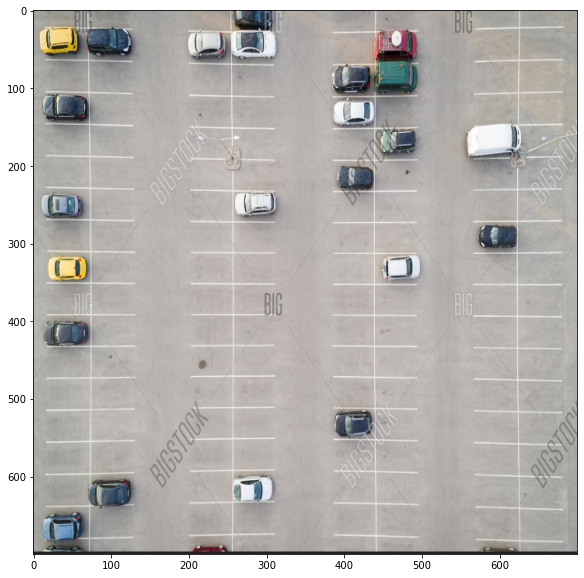

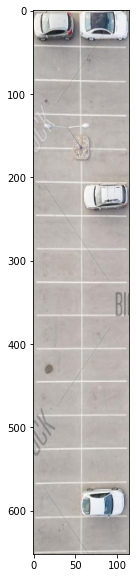

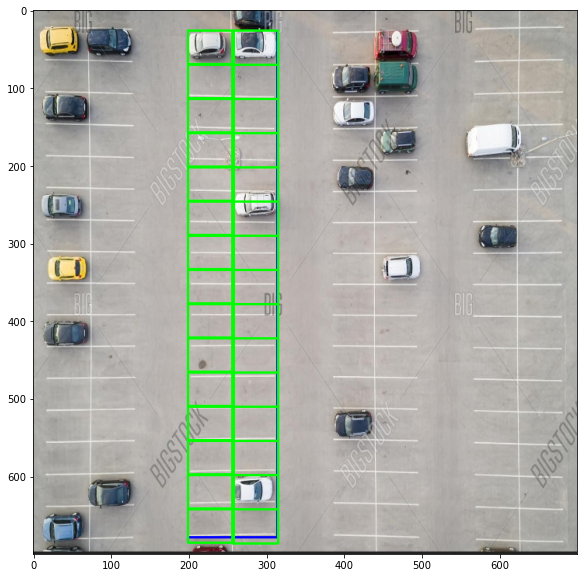

In [76]:
path = "C:\\Users\\Sivaraman\\Desktop\\Datasets\\car_parklot\\a2.jpg" #give the path of the image
image = cv2.imread(path)
image = cv2.resize(image,(700,700))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
crop , img ,boxes = select_slots(image)
print(" \n total boxes \n",len(boxes))
print("\n",boxes,"\n")
plot_img(image)
plot_img(crop)
plot_img(img)

In [24]:
#import the function
from tensorflow.keras.models import model_from_json
json_file = open('model_car.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model_car_weights.h5")

In [70]:
#classify each slots
im = image.copy()
clas = ["occupied","empty"]
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
data = []
free = 0
for coords in boxes:
    img = cv2.resize(im[coords[1]:coords[3],coords[0]:coords[2]],(224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img,axis=0)
    pred = model.predict(img)
    op=clas[np.argmax(pred)]
    print(op)
    if op=="empty":
        cv2.rectangle(im,(coords[0],coords[1]) , (coords[2],coords[3]),(0,255,0),-1)
        free+=1
  

occupied
occupied
empty
empty
empty
empty
empty
empty
empty
occupied
empty
occupied
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
occupied
empty
empty
empty
empty


In [71]:
#show the classified image
im2 = im.copy()
cv2.putText(im2,"Total free-"+str(free),(350,25),cv2.FONT_HERSHEY_SIMPLEX,1,(200,200,0),2)
cv2.imshow("win",im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#These functions are not used in the notebook 
def detect_edges(img_path,p1=100,p2=200):
    img = cv2.imread(img_path,0)
    edges = cv2.Canny(img,p1,p2)
    return img,edges
def hough_lines(edges,img):
    lines = cv2.HoughLines(edges,1,np.pi/180)
    for line in lines:
        rho , theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = rho*a
        y0 = rho*b
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,200,0),2)
    return img,lines
def hough_linesP(edges,img,xp=25):
    cp = img.copy()
    lines = cv2.HoughLinesP(edges, rho=0.1, theta=np.pi/10, threshold=15, minLineLength=9, maxLineGap=4)
    for line in lines:
        for x1,y1,x2,y2 in line:
            if abs(y2-y1) <=1 and abs(x2-x1) >= xp: #and abs(x2-x1) >=25 and abs(x2-x1) <= 55:
                #cleaned.append((x1,y1,x2,y2))
                cv2.line(img, (x1, y1), (x2, y2), (0,255,0), 3)
    edges1 = cv2.Canny(img,100,200)
    lines2 = cv2.HoughLinesP(edges1, rho=0.1, theta=np.pi/10, threshold=15, minLineLength=9, maxLineGap=4)
    for line in lines2:
        for x1,y1,x2,y2 in line:
            if abs(y2-y1) <=1 and abs(x2-x1) >= xp: #and abs(x2-x1) >=25 and abs(x2-x1) <= 55:
                #cleaned.append((x1,y1,x2,y2))
                cv2.line(cp, (x1, y1), (x2, y2), (0,255,0), 2)
    
    return img

def sort_list(a,par):
    if par == 1:
        size = len(a)
        for i in range(0 , size-1):
            for j in range(i+1,size):
                if a[i][0] > a[j][0]:
                    temp = a[i]
                    a[i] = a[j]
                    a[j] = temp
    else:
        h_size = int(len(a)/2)
        size = len(a)
        for i in range(0 , h_size-1):
            for j in range(i+1,h_size):
                if  a[i][1] > a[j][1]:
                    temp = a[i]
                    a[i] = a[j]
                    a[j] = temp
        for i in range(h_size , size-1):
            for j in range(i+1,size):
                if  a[i][1] > a[j][1]:
                    temp = a[i]
                    a[i] = a[j]
                    a[j] = temp
        
        
    
    return a
def mid_point2(a):
    x1 = a[0][0]
    y1 = a[0][1]
    x2 = a[1][0]
    y2 = a[1][1]
    mp = [(x1+x2)/2,(y1+y2)/2]
    return mp      
def dist2(a):
    x1 = a[0][0]
    y1 = a[0][1]
    x2 = a[1][0]
    y2 = a[1][1]
    dist = (((x1-x2)**2 + (y1-y2)**2)**0.5)
    return dist
def select_slots2(img):
    img2 = img.copy()
    img3 = img.copy()
    coords = []
    for i in range(4):
        r = cv2.selectROI(img2)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        x1 = int(r[0])
        y1 = int(r[1])
        x2 = int(r[0]+r[2])
        y2 = int(r[1]+r[3])
        x,y = mid_point([x1,y1,x2,y2])
        x , y = int(x) , int(y)
        coords.append([x,y])
    new_coords = sort_list(coords,1)
    new_coords = sort_list(new_coords,0)
    lines = []
    top_line = []
    bottom_line = []
    top_line.append(new_coords[0])
    top_line.append(new_coords[2])
    bottom_line.append(new_coords[1])
    bottom_line.append(new_coords[3])
    lines.append([new_coords[0],new_coords[2]])
    lines.append([new_coords[1],new_coords[3]])
    lines.append([new_coords[0],new_coords[1]])
    lines.append([new_coords[2],new_coords[3]])
    for line in lines:
        x1 , y1 = line[0][0] , line[0][1]
        x2 , y2 = line[1][0] , line[1][1]
        cv2.line(img2,(x1,y1),(x2,y2),(0,200,0),2)
    il = []
    for i in range(2):
        b = cv2.selectROI(img2)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        x1 = int(b[0])
        y1 = int(b[1])
        x2 = int(b[0]+b[2])
        y2 = int(b[1]+b[3])
        x,y = mid_point([x1,y1,x2,y2])
        x , y = int(x) , int(y)
        il.append([x,y])
    cv2.line(img2,(il[0][0],il[0][1]),(il[1][0],il[1][1]),(0,255,0),2)
    mp_top = mid_point2(top_line)
    mp_seg = mid_point2(il)
    mp_bottom = mid_point2(bottom_line)
    tot_dist = dist(mp_top,mp_bottom)
    seg_dist = dist(mp_top,mp_seg)
    nos = int(tot_dist/seg_dist)
    print(nos)
    
    
    
        

    return img2,new_coords
